In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [27]:
domestic_path = r"D:\testing\BCT_3\data\kolkata-2025-domestic.csv"
intl_path = r"D:\testing\BCT_3\data\kolkata-2025-international.csv"

df_dom = pd.read_csv(domestic_path)
df_intl = pd.read_csv(intl_path)

In [28]:
print("Missing values per column in Domestic Data:")
print(df_dom.isnull().sum())

Missing values per column in Domestic Data:
Year                   0
Month                  0
Origin                 0
Dest                   0
Pax From Origin        0
Pax To Origin          0
Freight From Origin    0
Frieght To Origin      0
Mail From Origin       0
Mail To Origin         0
dtype: int64


In [29]:
df_dropped = df_dom.dropna()
print(f"\nRows after dropping missing values: {len(df_dropped)}")


Rows after dropping missing values: 502


In [30]:
numeric_cols = df_dom.select_dtypes(include=[np.number]).columns
df_filled = df_dom.copy()
df_filled[numeric_cols] = df_filled[numeric_cols].fillna(df_filled[numeric_cols].mean())
print("\nMissing values after fillna(mean):")
print(df_filled[numeric_cols].isnull().sum())


Missing values after fillna(mean):
Year                   0
Month                  0
Pax From Origin        0
Pax To Origin          0
Freight From Origin    0
Frieght To Origin      0
Mail From Origin       0
Mail To Origin         0
dtype: int64


In [31]:
sample_dict = {
    'Flight_ID': [101, 102, 102, 103, 104, 104],
    'Route': ['CCU-DEL', 'CCU-BOM', 'CCU-BOM', 'CCU-MAA', 'CCU-BLR', 'CCU-BLR'],
    'Value': [500, 600, 600, 700, 800, 800]
}
sample_df = pd.DataFrame(sample_dict)
print("\nSample DataFrame (with duplicates):")
print(sample_df)


Sample DataFrame (with duplicates):
   Flight_ID    Route  Value
0        101  CCU-DEL    500
1        102  CCU-BOM    600
2        102  CCU-BOM    600
3        103  CCU-MAA    700
4        104  CCU-BLR    800
5        104  CCU-BLR    800


In [32]:
sample_df_clean = sample_df.drop_duplicates()
print("\nSample DataFrame (after removing duplicates):")
print(sample_df_clean)


Sample DataFrame (after removing duplicates):
   Flight_ID    Route  Value
0        101  CCU-DEL    500
1        102  CCU-BOM    600
3        103  CCU-MAA    700
4        104  CCU-BLR    800


In [33]:
new_names = {
    'Pax From Origin': 'Total_Passengers_Out',
    'Pax To Origin': 'Total_Passengers_In',
    'Dest': 'Destination_Airport'
}
df_renamed = df_dom.rename(columns=new_names)

In [34]:
df_renamed['Month'] = df_renamed['Month'].astype(str)
df_renamed['Total_Passengers_Out'] = df_renamed['Total_Passengers_Out'].fillna(0).astype(int)

print("\nFinal Data Types of Renamed DataFrame:")
print(df_renamed.dtypes[['Month', 'Total_Passengers_Out']])


Final Data Types of Renamed DataFrame:
Month                   object
Total_Passengers_Out     int32
dtype: object


In [35]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Frequency')

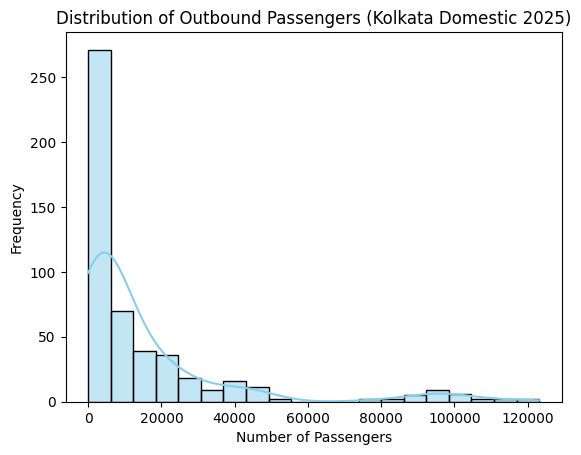

In [37]:
sns.histplot(df_dom['Pax From Origin'], bins=20, kde=True, color='skyblue')

# 4. Add titles and labels
plt.title("Distribution of Outbound Passengers (Kolkata Domestic 2025)")
plt.xlabel("Number of Passengers")
plt.ylabel("Frequency")

In [38]:
plt.show()